# Cleaning and Analysis

In [68]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [69]:
#read the tables
#exports from 2001 - 2022
df = pd.read_pickle("data_extracted/raw_exports.pkl")
product_name_df = pd.read_excel("clean_tables/product_name.xlsx", dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   País de Destino     10463 non-null  object
 1   Valor FOB(dólares)  10463 non-null  object
 2   Peso Neto(Kilos)    10463 non-null  object
 3   Peso Bruto(Kilos)   10463 non-null  object
 4   Porcentaje FOB      10463 non-null  object
 5   Partida             10463 non-null  object
 6   Año                 10463 non-null  object
dtypes: object(7)
memory usage: 572.3+ KB


In [71]:
df.head()

,País de Destino,Valor FOB(dólares),Peso Neto(Kilos),Peso Bruto(Kilos),Porcentaje FOB,Partida,Año
0,No se encontraron registros,No se encontraron registros,No se encontraron registros,No se encontraron registros,No se encontraron registros,0810400000,2001
1,GB - UNITED KINGDOM,3874941.16,1587187.6,1839667.0,34.43,0806100000,2001
2,US - UNITED STATES,2968113.2,1926170.2,2254134.0,26.37,0806100000,2001
3,HK - HONG KONG,2939835.64,1794430.6,2176615.0,26.12,0806100000,2001
4,CA - CANADA,396411.78,296123.6,358465.5,3.52,0806100000,2001


In [72]:
#change the column names
df.columns = ['country', 'fob', 'net_weight', 'gross_weight', 'fob_per', 'product_code', 'year']

In [73]:
product_name_df.head()

,product_code,product_name
0,0810400000,Red cranberries
1,0806100000,Fresh grapes
2,0709200000,Asparagus
3,0804400000,Avocados
4,0307430000,Mussels


In [74]:
#clean product_name_df
product_name_df['product_name'] = product_name_df['product_name'].str[1:]
product_name_df['product_code'] = product_name_df['product_code'].astype('object')

In [75]:
#create a column with the product_names
name_dict = dict(zip(product_name_df['product_code'], product_name_df['product_name']))
df['product_name'] = df['product_code'].map(name_dict)

## Comparative graph of exports (fob_M) by sectors
The objective of this chapter is elaborate a graph of the sums of the exports by exports and by year
1. Create the column "sector"
2. Group by "sector" and sum
3. Graph

In [76]:
# 1.Create the column 'sector'
#assign the type of sector in function of the product_code (if clause)
list_agricultural = ['0810400000',
                     '0806100000',
                     '0709200000',
                     '0804400000',
                     '0804502000',
                     '0803901100',
                     '0904201010',
                     '2005991000']

list_fishing = ['0307430000',
                 '1605540000']

list_textile = ['6109100031',
               '6109100039',
               '6204610000',
               '6105100041']

list_industrial = ['2510100000',
                   '7113190000',
                   '7901120000',
                   '7408110000',
                   '2309909000',
                   '4911100000']

def map_sector(product_code):
    if product_code in list_agricultural:
        return 'agricultural'
    elif product_code in list_fishing:
        return 'fishing'
    elif product_code in list_textile:
        return 'textile'
    elif product_code in list_industrial:
        return 'industrial'
    
df['sector'] = df['product_code'].apply(lambda x: map_sector(x))


In [77]:
#select total (country)
df_sector = df[df['country'] == 'TOTAL - TOTAL']
df_sector = df_sector[['country', 'fob', 'year', 'sector']]
df_sector.head()

,country,fob,year,sector
18,TOTAL - TOTAL,11255952.76,2001,agricultural
49,TOTAL - TOTAL,63947053.7,2001,agricultural
58,TOTAL - TOTAL,3477732.94,2001,agricultural
79,TOTAL - TOTAL,26833484.49,2001,agricultural
86,TOTAL - TOTAL,7290.0,2001,industrial


In [78]:
#clean fob_M column
temp = pd.to_numeric(df['fob'], errors = 'coerce')
temp = temp.fillna(0)
df_sector['fob'] = temp
df_sector['fob'].describe()

count    3.720000e+02
mean     1.292521e+08
std      1.477261e+08
min      2.700000e+01
25%      3.021294e+07
50%      8.914685e+07
75%      1.733689e+08
max      8.760091e+08
Name: fob, dtype: float64

In [79]:
# 2. Group by sector and year and sum
#sum by sector and year
df_sector['year'] = pd.to_datetime(df_sector['year'], format='%Y')
sums = df_sector.groupby(['sector', 'year'])['fob'].sum()
df_sector_sums = sums.unstack('sector')
df_sector_sums[['agricultural', 'textile', 'industrial', 'fishing']] = df_sector_sums[['agricultural', 'textile', 'industrial', 'fishing']].fillna(0)
df_sector_sums.head()

sector,agricultural,fishing,industrial,textile
year,,,,
2001-01-01,1.055142e+08,0.0,9.893198e+07,1.392496e+08
2002-01-01,1.387914e+08,0.0,1.264228e+08,1.781103e+08
2003-01-01,1.781459e+08,0.0,1.519094e+08,2.205674e+08
2004-01-01,2.237590e+08,0.0,2.254527e+08,3.052970e+08
2005-01-01,2.554410e+08,0.0,2.789196e+08,3.504142e+08


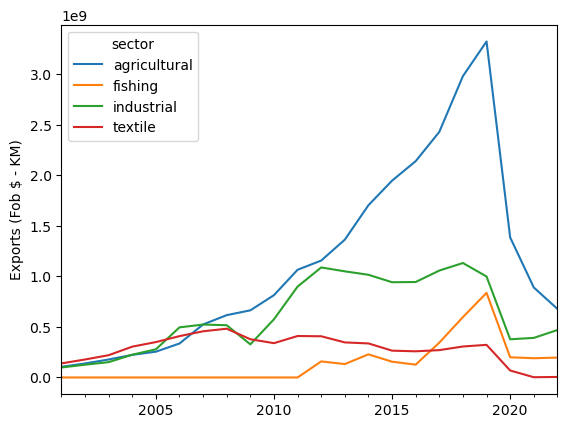

In [80]:
# 3. Graph
ax = df_sector_sums.plot(kind='line')
ax.set_xlabel('')
ax.set_ylabel('Exports (Fob $ - KM)')
plt.show()

In [81]:
#write as excel file
df_sector_sums.to_excel("clean_tables/exportsBySector.xlsx")

# Comparative graph of exports by country and by product name (top three)

In [82]:
#deselect total and no registers
df_countries = df[~df['country'].isin(['TOTAL - TOTAL', 'No se encontraron registros'])]
df_countries.head()

,country,fob,net_weight,gross_weight,fob_per,product_code,year,product_name,sector
1,GB - UNITED KINGDOM,3874941.16,1587187.6,1839667.0,34.43,0806100000,2001,Fresh grapes,agricultural
2,US - UNITED STATES,2968113.2,1926170.2,2254134.0,26.37,0806100000,2001,Fresh grapes,agricultural
3,HK - HONG KONG,2939835.64,1794430.6,2176615.0,26.12,0806100000,2001,Fresh grapes,agricultural
4,CA - CANADA,396411.78,296123.6,358465.5,3.52,0806100000,2001,Fresh grapes,agricultural
5,VE - VENEZUELA,317369.31,260420.7,305197.1,2.82,0806100000,2001,Fresh grapes,agricultural


In [83]:
#sum by year and by country, order them by fob, and select the top 3 of each sector
country_clean = df_countries['country'].str.slice(start = 5)
df_countries['country'] = country_clean


C:\Windows\Temp\ipykernel_14608\4115197773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['country'] = country_clean


In [84]:
#create the list of sectors
list_sectors = list(df_countries['sector'].unique())

In [85]:
#divide fob by 10**6
df_countries['fob_M'] = df_countries['fob'].apply(lambda x: x/(10**6))

C:\Windows\Temp\ipykernel_14608\1944871591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['fob_M'] = df_countries['fob'].apply(lambda x: x/(10**6))


In [86]:
#create a funciton to plot the top n countries or product codes

def plot_var_top_n(var, n):
    '''
    Function that plots and then saves the plots in "plots" file,
    based on the variable that is meant to be graphed (countries or product name)
    and the number of each category

    var = string type ('country' or 'product name')
    n = numeric type (greater than Zero)

    '''
    for sector in list_sectors:

        #list the top 3 countries for each sector
        df_countries_sums = df_countries[[var, 'fob_M']][df_countries['sector'] == sector].groupby([var]).sum()
        top_countries = df_countries_sums.sort_values(by ='fob_M', ascending= False)[0:n]
        list_top_countries = list(top_countries.index)

        #select the top countries of the first data set
        df_top_countries = df_countries[df_countries[var].isin(list_top_countries)]
        
        #sum fob by year and country
        df_countries_sector = df_top_countries[[var, 'fob_M', 'year']][df_top_countries['sector'] == sector].groupby([var, 'year'])['fob_M'].sum()

        #unstack
        df_countries_sector_sums = df_countries_sector.unstack(var)
        
        #fill with 0 where nas
        df_countries_sector_sums = df_countries_sector_sums.fillna(0)

        #plot 
        ax_countries = df_countries_sector_sums.plot(kind='line')
        ax_countries.set_xlabel('')
        ax_countries.set_ylabel('Exports (Fob M $)')
        ax_countries.set_title(f'{sector} sector')

        #save fig
        plt.savefig(f'plots/{sector}_{var}.png', format = 'png')



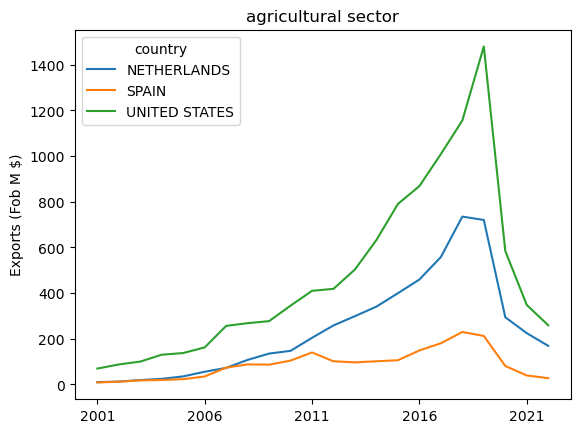

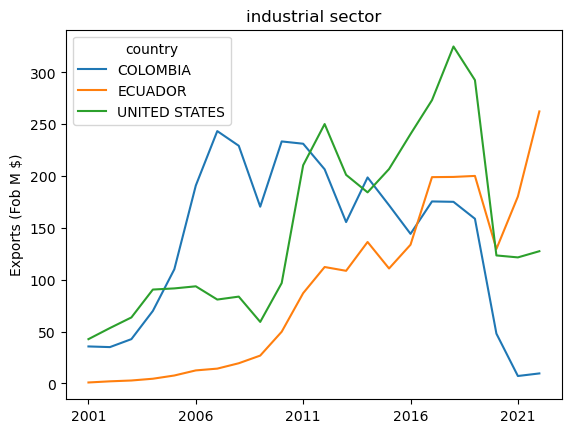

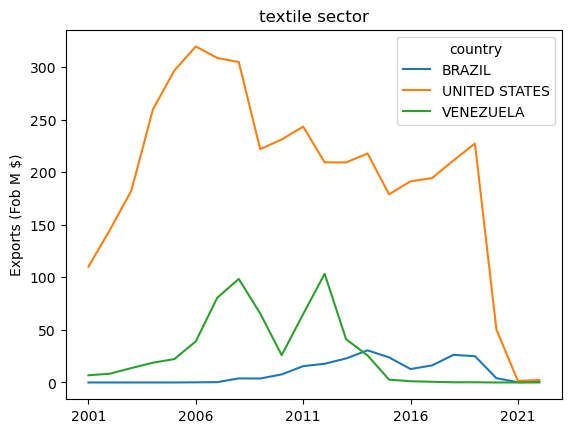

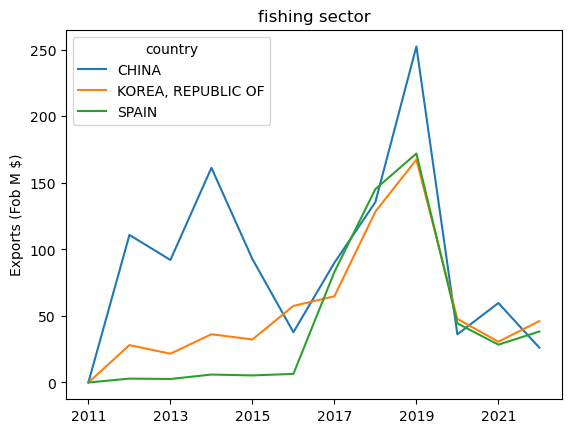

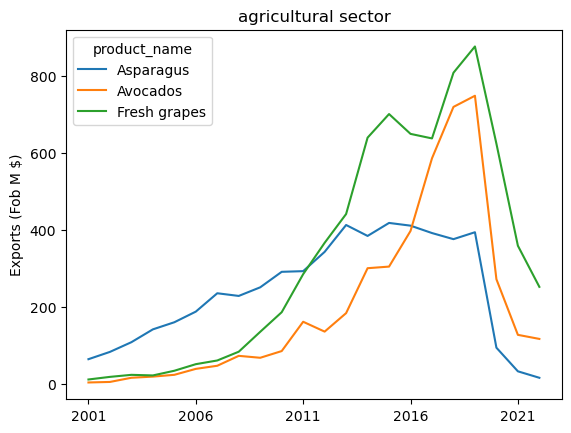

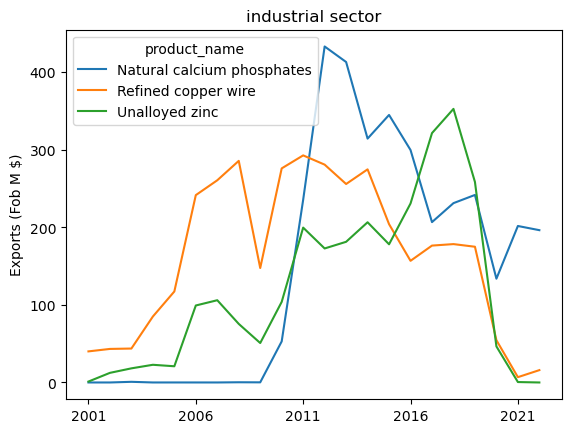

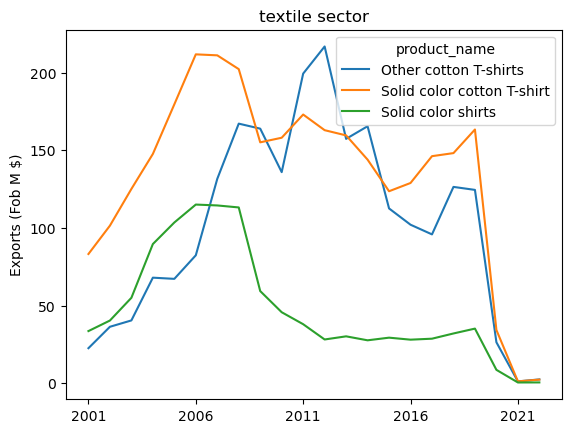

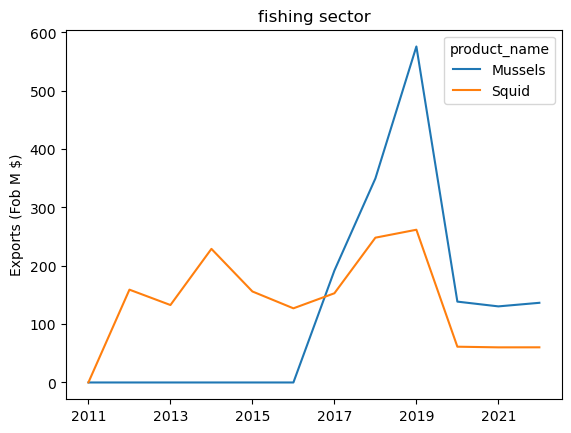

In [87]:
plot_var_top_n(var = 'country', n = 3)
plot_var_top_n(var = 'product_name', n = 3)